In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [6]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
# No missing values

In [10]:
df.describe(include = 'all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


In [ ]:
# Male variable is alredy encoded

# City and country do not have limited number of values, therefrore the can be omited from our evaluation untill we do
# a detailed analysis. 

### Exploratory Data Analysis

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

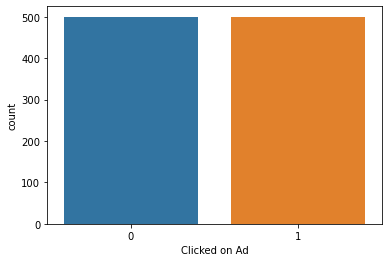

In [12]:
sns.countplot(x = df['Clicked on Ad'])

In [13]:
# Exact 50-50. Looks like a made up data set

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

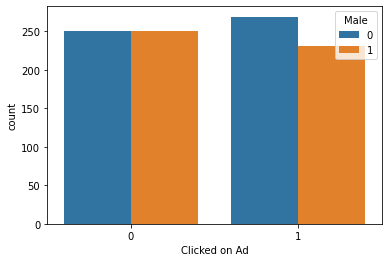

In [16]:
sns.countplot(x = 'Clicked on Ad' , data = df , hue = 'Male')

In [28]:
# Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [30]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [31]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',  'Male', ]]
y = df['Clicked on Ad']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [32]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = logistic.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

print (classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       165
           1       0.83      0.93      0.88       135

    accuracy                           0.88       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300

